In [1]:
# Loan Approval Prediction
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier


In [3]:
data = pd.read_csv('loan.csv')

In [4]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
data.describe()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [12]:
# Categorical columns -> fill with mode
for col in ['Gender', 'Married', 'Self_Employed', 'Dependents']:
    data[col].fillna(data[col].mode()[0], inplace=True)


C:\Users\Mani\AppData\Local\Temp\ipykernel_9772\2188629843.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0], inplace=True)


In [14]:
# Numerical columns -> fill with median
data['LoanAmount'].fillna(data['LoanAmount'].median(), inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0], inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace=True)

C:\Users\Mani\AppData\Local\Temp\ipykernel_9772\1147051948.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['LoanAmount'].fillna(data['LoanAmount'].median(), inplace=True)
C:\Users\Mani\AppData\Local\Temp\ipykernel_9772\1147051948.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

In [15]:
print(data.isnull().sum())

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [16]:
data.shape

(614, 13)

In [17]:
data.Gender.value_counts()

Gender
Male      502
Female    112
Name: count, dtype: int64

C:\Users\Mani\AppData\Local\Temp\ipykernel_9772\363500858.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Gender', data = data, palette = 'hls')


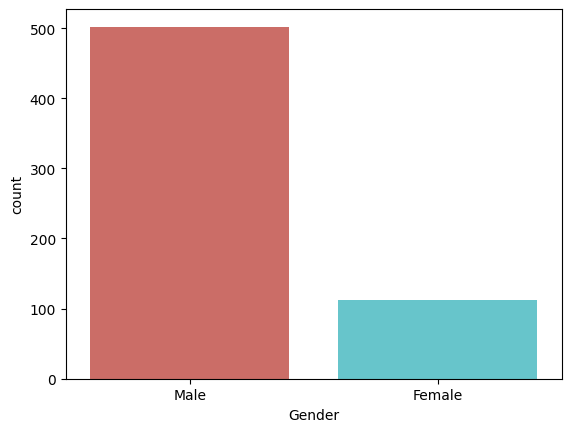

In [18]:
sns.countplot(x = 'Gender', data = data, palette = 'hls')
plt.show()

In [28]:
countMale = len(data[data.Gender == 'Male'])
countFemale = len(data[data.Gender == 'Female'])
countNull = data['Gender'].isnull().sum()

print(countFemale)
print(countMale)
print(countNull)

print("Percentage of Male applicant: {:.2f}%".format((countMale / (len(data.Gender))*100)))
print("Percentage of Female applicant: {:.2f}%".format((countFemale / (len(data.Gender))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(data.Gender))*100)))

112
502
0
Percentage of Male applicant: 81.76%
Percentage of Female applicant: 18.24%
Missing values percentage: 0.00%


In [ ]:
data.Married.value_counts()

Married
Yes    401
No     213
Name: count, dtype: int64

C:\Users\Mani\AppData\Local\Temp\ipykernel_9772\2362492143.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Married', data = data, palette = 'hls')


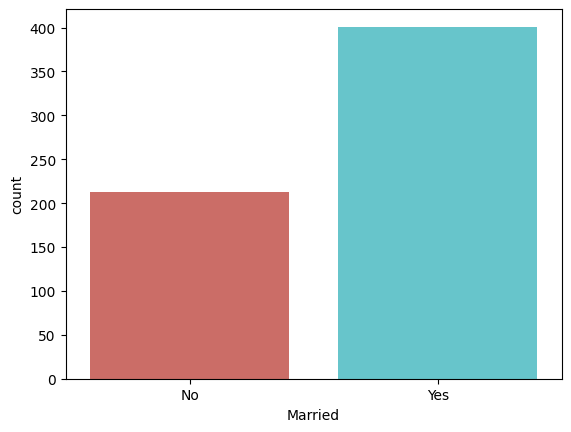

In [31]:
sns.countplot(x = 'Married', data = data, palette = 'hls')
plt.show()

In [32]:
data.Education.value_counts()

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

C:\Users\Mani\AppData\Local\Temp\ipykernel_9772\3661240268.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Education', data = data, palette = 'hls')


<Axes: xlabel='Education', ylabel='count'>

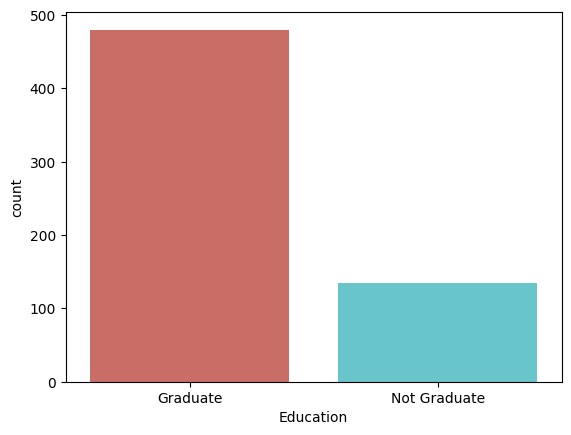

In [33]:
sns.countplot(x = 'Education', data = data, palette = 'hls')

In [34]:
data.drop('Loan_ID', axis=1, inplace=True)
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Categorical Variables 
In this section, the imputation for categorical variables will be performed using mode.

In [ ]:
data['Gender'].fillna(data['Gender'].mode()[0],inplace=True)
data['Married'].fillna(data['Married'].mode()[0],inplace=True)
data['Dependents'].fillna(data['Dependents'].mode()[0],inplace=True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0],inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0],inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0],inplace=True)

C:\Users\Mani\AppData\Local\Temp\ipykernel_9772\3899200643.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Gender'].fillna(data['Gender'].mode()[0],inplace=True)
C:\Users\Mani\AppData\Local\Temp\ipykernel_9772\3899200643.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


Numerical Variables 
The next section is imputation for numerical variables using mean.

In [36]:
data['LoanAmount'].fillna(data['LoanAmount'].mean(),inplace=True)

C:\Users\Mani\AppData\Local\Temp\ipykernel_9772\1355853846.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['LoanAmount'].fillna(data['LoanAmount'].mean(),inplace=True)


One-hot Encoding 
In this section, I will transform categorical variables into a form that could be provided by ML algorithms to do a better prediction.

In [38]:
data = pd.get_dummies(data)

# Drop columns
data = data.drop(['Gender_Female', 'Married_No', 'Education_Not Graduate', 
            'Self_Employed_No', 'Loan_Status_N'], axis = 1)

# Rename columns name
new = {'Gender_Male': 'Gender', 'Married_Yes': 'Married', 
    'Education_Graduate': 'Education', 'Self_Employed_Yes': 'Self_Employed',
    'Loan_Status_Y': 'Loan_Status'}

data.rename(columns=new, inplace=True)

Check Outliers Function

We’ll create a helper function to detect outliers using IQR

In [44]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Function to detect outliers
def detect_outliers(col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
    outliers = data[(data[col] < lower_limit) | (data[col] > upper_limit)]
    return outliers, lower_limit, upper_limit


In [45]:
outliers_income, low_inc, up_inc = detect_outliers('ApplicantIncome')
outliers_loan, low_loan, up_loan = detect_outliers('LoanAmount')

print("ApplicantIncome outliers:", len(outliers_income))
print("LoanAmount outliers:", len(outliers_loan))


ApplicantIncome outliers: 0
LoanAmount outliers: 41


In [46]:
data_removed = data[
    (data['LoanAmount'] >= low_loan) & (data['LoanAmount'] <= up_loan)
]

print("Original Data Size:", data.shape[0])
print("After Removing Outliers:", data_removed.shape[0])


Original Data Size: 614
After Removing Outliers: 573


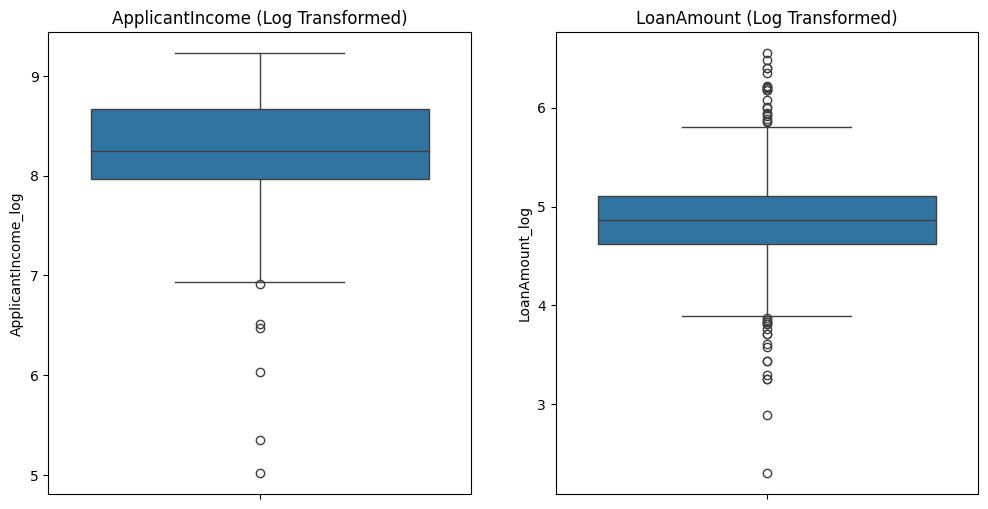

In [47]:
data['ApplicantIncome_log'] = np.log1p(data['ApplicantIncome'])
data['LoanAmount_log'] = np.log1p(data['LoanAmount'])

# Compare boxplots
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(y=data['ApplicantIncome_log'], ax=ax[0])
ax[0].set_title("ApplicantIncome (Log Transformed)")

sns.boxplot(y=data['LoanAmount_log'], ax=ax[1])
ax[1].set_title("LoanAmount (Log Transformed)")
plt.show()


In [48]:
num_cols = data.select_dtypes(include=['int64', 'float64']).columns
print(num_cols)


Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'ApplicantIncome_log',
       'LoanAmount_log'],
      dtype='object')


In [49]:
for col in num_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
    outliers = data[(data[col] < lower_limit) | (data[col] > upper_limit)]
    print(f"{col}: {len(outliers)} outliers")


ApplicantIncome: 0 outliers
CoapplicantIncome: 18 outliers
LoanAmount: 41 outliers
Loan_Amount_Term: 88 outliers
Credit_History: 89 outliers
ApplicantIncome_log: 6 outliers
LoanAmount_log: 39 outliers


In [ ]:
import numpy as np

for col in ['CoapplicantIncome','LoanAmount']:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
    # cap outliers
    data[col] = np.where(data[col] > upper_limit, upper_limit,
                np.where(data[col] < lower_limit, lower_limit, data[col]))


In [51]:
print(data['Loan_Amount_Term'].unique())
print(data['Credit_History'].unique())


[360. 120. 240. 180.  60. 300. 480.  36.  84.  12.]
[1. 0.]


Features Separating
Dependent features (Loan_Status) will be seperated from independent features.

In [52]:
X = data.drop(["Loan_Status"], axis=1)
y = data["Loan_Status"]

SMOTE Technique 
In previous exploration, it can be seen that the number between approved and rejected loan is imbalanced. In this section, oversampling technique will be used to avoid overfitting,

In [60]:
from imblearn.over_sampling import SMOTE

# SMOTE apply
X_resampled, y_resampled = SMOTE(random_state=42).fit_resample(X, y)

print("Before SMOTE:", y.value_counts())   # imbalance check
print("After SMOTE:", y_resampled.value_counts())  # balance check


Before SMOTE: Loan_Status
True     422
False    422
Name: count, dtype: int64
After SMOTE: Loan_Status
True     422
False    422
Name: count, dtype: int64


c:\Users\Mani\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


C:\Users\Mani\AppData\Local\Temp\ipykernel_9772\2114247320.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Loan_Status", data=data, palette="coolwarm")


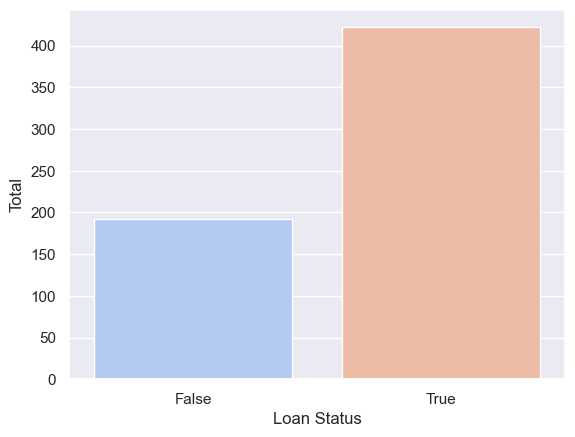

In [ ]:
# imblance check
sns.set_theme(style="darkgrid")
sns.countplot(x="Loan_Status", data=data, palette="coolwarm")
plt.xlabel('Loan Status')
plt.ylabel('Total')
plt.show()


C:\Users\Mani\AppData\Local\Temp\ipykernel_9772\1443804069.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_resampled, palette="coolwarm")


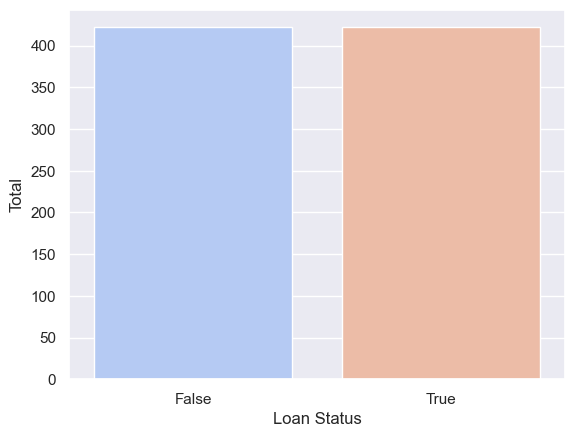

In [62]:
# Balanced plot
sns.countplot(x=y_resampled, palette="coolwarm")
plt.xlabel("Loan Status")
plt.ylabel("Total")
plt.show()

Splitting Data Set 

The data set will be split into 80% train and 20% test.

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

In [69]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg = LogisticRegression(max_iter=1000, solver='lbfgs', random_state=42)
log_reg.fit(X_train_scaled, y_train)
y_pred = log_reg.predict(X_test_scaled)
LG_accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy: {:.2f}%".format(LG_accuracy * 100))


Logistic Regression Accuracy: 85.80%


In [70]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[62 23]
 [ 1 83]]
              precision    recall  f1-score   support

       False       0.98      0.73      0.84        85
        True       0.78      0.99      0.87        84

    accuracy                           0.86       169
   macro avg       0.88      0.86      0.86       169
weighted avg       0.88      0.86      0.86       169



In [71]:
DTclassifier = DecisionTreeClassifier(random_state=42)
DTclassifier.fit(X_train, y_train)
y_pred_dt = DTclassifier.predict(X_test)
DT_accuracy = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Classifier Accuracy: {:.2f}%".format(DT_accuracy * 100))


Decision Tree Classifier Accuracy: 79.29%


In [72]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


[[68 17]
 [18 66]]
              precision    recall  f1-score   support

       False       0.79      0.80      0.80        85
        True       0.80      0.79      0.79        84

    accuracy                           0.79       169
   macro avg       0.79      0.79      0.79       169
weighted avg       0.79      0.79      0.79       169



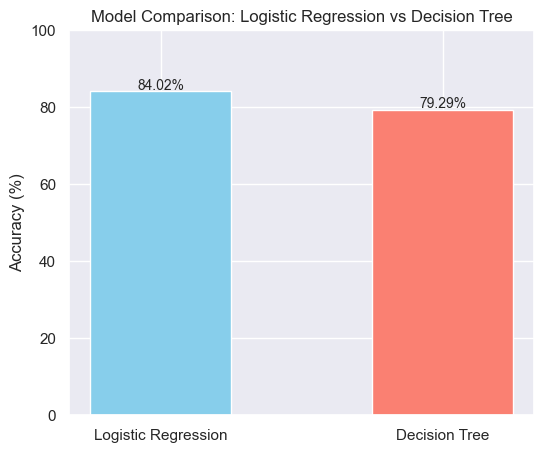

In [73]:
import matplotlib.pyplot as plt

# Models ke accuracy 
log_reg_acc = 84.02   # logistic regression accuracy from your result
dt_acc = DT_accuracy * 100   # decision tree accuracy from your result

# Bar chart
models = ['Logistic Regression', 'Decision Tree']
accuracy = [log_reg_acc, dt_acc]

plt.figure(figsize=(6,5))
bars = plt.bar(models, accuracy, color=['skyblue', 'salmon'], width=0.5)

# har bar k upar value likhna
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f"{yval:.2f}%", ha='center', fontsize=10)

plt.ylim(0, 100)
plt.ylabel("Accuracy (%)")
plt.title("Model Comparison: Logistic Regression vs Decision Tree")
plt.show()
